In [2]:
import pandas as pd 

In [3]:
data=pd.DataFrame()
import os
for i in os.listdir('./phishing/'):
    dataa_new=pd.read_csv('./phishing/'+i)
    lable=dataa_new['content']
    nhan=[1]*len(lable)
    data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))

data=data.dropna()
print(data.shape)

/tmp/ipykernel_841/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/354482346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/354482346.py:7: FutureWarning: The frame.append method is dep

(4158, 2)


In [4]:
data_enron=pd.DataFrame()
for i in os.listdir('./enron/'):
    dataa_new=pd.read_csv('./enron/'+i)

    lable=dataa_new['content']
    nhan=[0]*len(lable)
    data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
    data_enron=data_enron.dropna()
data=pd.concat([data,data_enron])
# data=data.dropna()
print(data.head)

/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/199775088

<bound method NDFrame.head of                                                    Text  Class
0                                                     .      1
1     Dear Customer,\n\nCheck AMERICAN EXPRESS  Atta...      1
2     Request to Update Your Email\n \n\n \n \n    \...      1
3     Mail Quota: (98% Full)\n\n\n\n\n\nAttention:Â ...      1
4     Confirm Your Transactions\n\n \n \n   \n\t \n ...      1
...                                                 ...    ...
4995                      Sorry, here's the attachment.      0
4996  I would like to do fewer resolutions authorizi...      0
4997  Keep me posted on this matter.  Mark\n----- Fo...      0
4998  Bruce:  I am tied up for lunch, but let's get ...      0
4999                        Thanks for the memo.   Mark      0

[47770 rows x 2 columns]>


/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))
/tmp/ipykernel_841/1997750884.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_enron=data_enron.append(pd.DataFrame({'Text':lable,'Class':nhan}))


In [5]:
from sklearn.utils import shuffle
data=shuffle(data,random_state=42)
data

,Text,Class
2046,This file contains a summary of the weekly mec...,0
978,Beverly - once again thanks so much for your ...,0
2431,NQ2167.1\nNQ2177.1\nNQ4558.1\nNQ4558.4\nNS7295...,0
2401,Call me if you have any further questions.\n\n...,0
2320,"Hi Robin,\n\nHere is the Power TXT file.\n\nBr...",0
...,...,...
2297,Boys:\n \nI would like to nominate Elvis for t...,0
1936,Wow - what a spectacular accomplishment. This...,0
270,Meeting of Insurance Law Section\nFour Seasons...,0
729,"html PUBLIC ""-//W3C//DTD HTML 4.01 Transitiona...",1


In [6]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [7]:
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
data['Text']=data['Text'].apply(lambda x: remove_stopwords(x))
data['Text']=data['Text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word,pos=wordnet.VERB) for word in x.split()]))

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

/home/haiyen/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


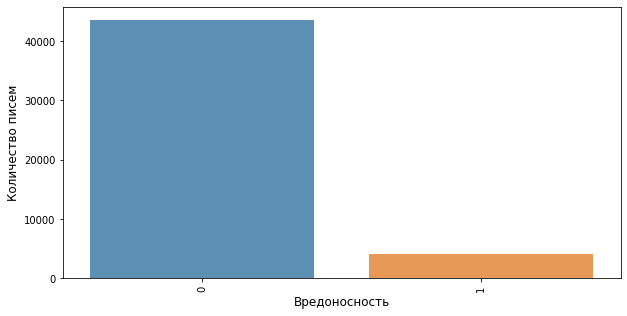

In [9]:
cnt_pro = data['Class'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Количество писем', fontsize=12)
plt.xlabel('Вредоносность', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [10]:
from bs4 import BeautifulSoup
import re
def cleanText(text):
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
data['Text'] = data['Text'].apply(cleanText)

/home/haiyen/.local/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/haiyen/.local/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "phishing" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/haiyen/.local/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [12]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [13]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [14]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Class]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Class]), axis=1)

In [15]:
train_tagged.shape

(33439,)

In [16]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [17]:
model_dbow = Doc2Vec()
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 33439/33439 [00:00<00:00, 728656.87it/s]


In [18]:
from sklearn import utils

In [19]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 33439/33439 [00:00<00:00, 886798.13it/s]


CPU times: user 6min 7s, sys: 1min 20s, total: 7min 27s
Wall time: 3min 29s


In [20]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [21]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [24]:
model_pip=[]
model_pip.append(('Logistic Regression',LogisticRegression()))
model_pip.append(('Random Forest',RandomForestClassifier()))
model_pip.append(('XGBoost',XGBClassifier()))
model_pip.append(('SVM',SVC(probability=True)))
model_pip.append(('KNN',KNeighborsClassifier()))
model_pip.append(('Naive Bayes',GaussianNB()))
model_pip.append(('Decision Tree',DecisionTreeClassifier()))
model_pip.append(('MLP',MLPClassifier()))
model_pip.append(('AdaBoost',AdaBoostClassifier()))
model_pip.append(('Gradient Boosting',GradientBoostingClassifier()))


In [25]:
acc=[]
f1=[]
precision=[]
recall=[]
roc_auc=[]
conf_mat=[]
cl=[]

In [26]:
import pickle
for classifier in model_pip:
    classifier[1].fit(X_train,y_train)
    y_pred=classifier[1].predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    roc_auc.append(roc_auc_score(y_test,y_pred))
    conf_mat.append(confusion_matrix(y_test,y_pred))
    cl.append(classifier[1])
    pickle.dump(classifier[1],open('model/'+classifier[0]+'.pkl','wb'))    

/home/haiyen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
plt.rcParams.update({'font.size': 22})

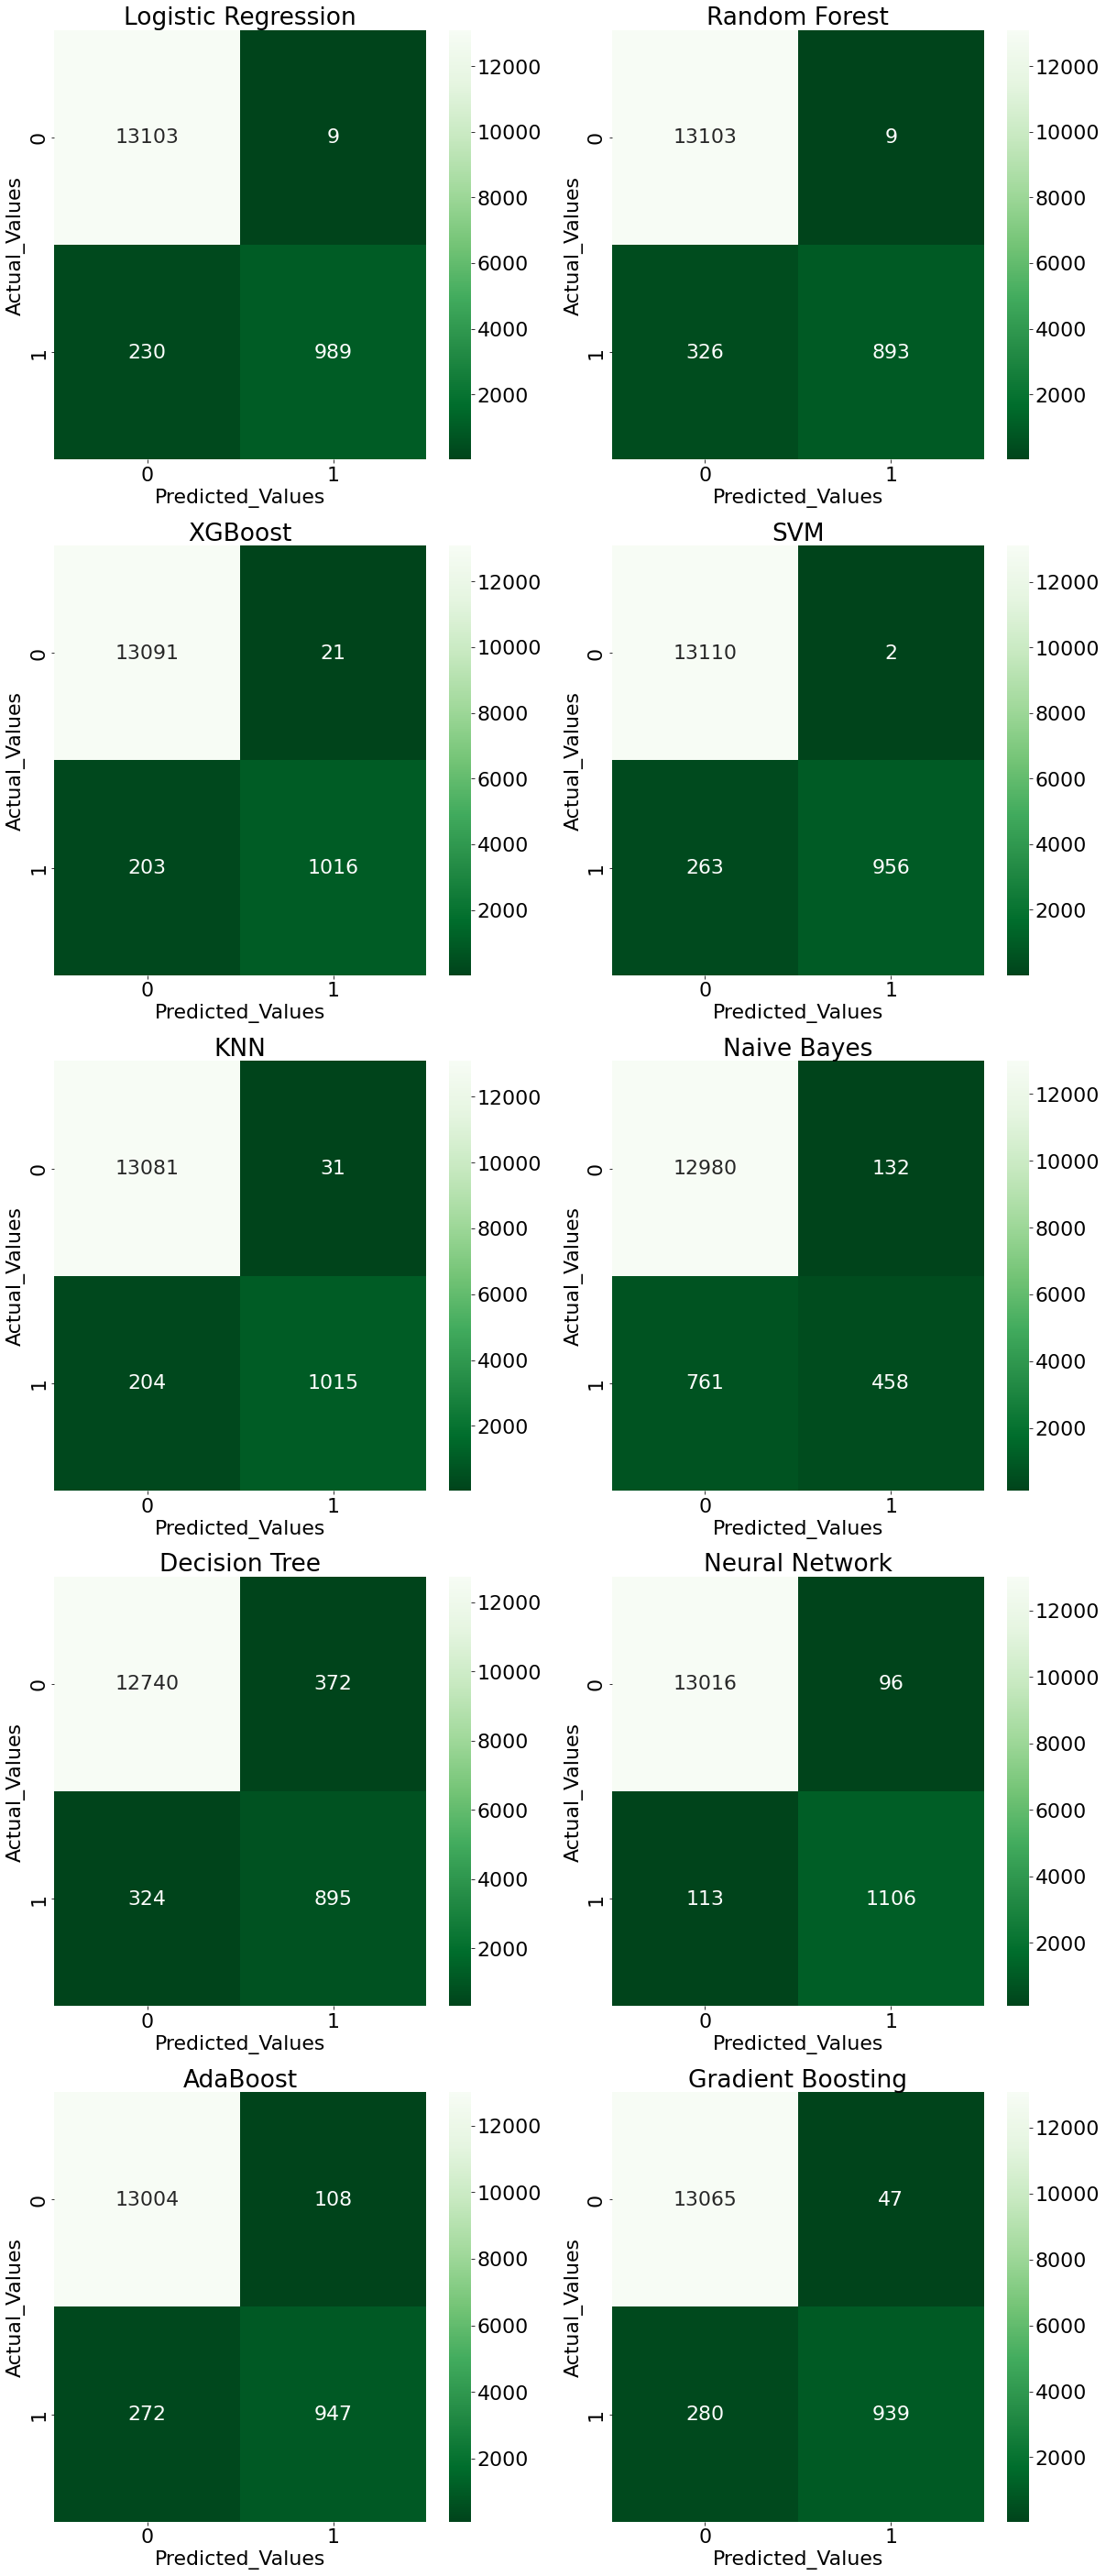

In [38]:
fig=plt.figure(figsize=(20,50))

for i in range(0,len(conf_mat)):
    cm_con=conf_mat[i]
    model=model_pip[i][0]
    sub_fig_title=fig.add_subplot(5,2,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='Greens_r',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')

In [28]:
result=pd.DataFrame({'Model': model_pip, 'Accuracy': acc, 'AUC': roc_auc, 'F1-score': f1, 'Precision': precision, 'Recall': recall})
result

,Model,Accuracy,AUC,F1-score,Precision,Recall
0,"(Logistic Regression, LogisticRegression())",0.983323,0.905317,0.892197,0.990982,0.811321
1,"(Random Forest, (DecisionTreeClassifier(max_fe...",0.976624,0.865941,0.842056,0.990022,0.732568
2,"(XGBoost, XGBClassifier(base_score=0.5, booste...",0.984370,0.915934,0.900709,0.979749,0.833470
3,"(SVM, SVC(probability=True))",0.981509,0.892048,0.878273,0.997912,0.784249
4,"(KNN, KNeighborsClassifier())",0.983602,0.915143,0.896247,0.970363,0.832650
5,"(Naive Bayes, GaussianNB())",0.937688,0.682825,0.506357,0.776271,0.375718
6,"(Decision Tree, DecisionTreeClassifier())",0.951434,0.852919,0.720032,0.706393,0.734208
7,"(Neural Network, MLPClassifier())",0.985416,0.949990,0.913672,0.920133,0.907301
8,"(AdaBoost, (DecisionTreeClassifier(max_depth=1...",0.973484,0.884315,0.832894,0.897630,0.776866
9,"(Gradient Boosting, ([DecisionTreeRegressor(cr...",0.977182,0.883360,0.851701,0.952333,0.770304


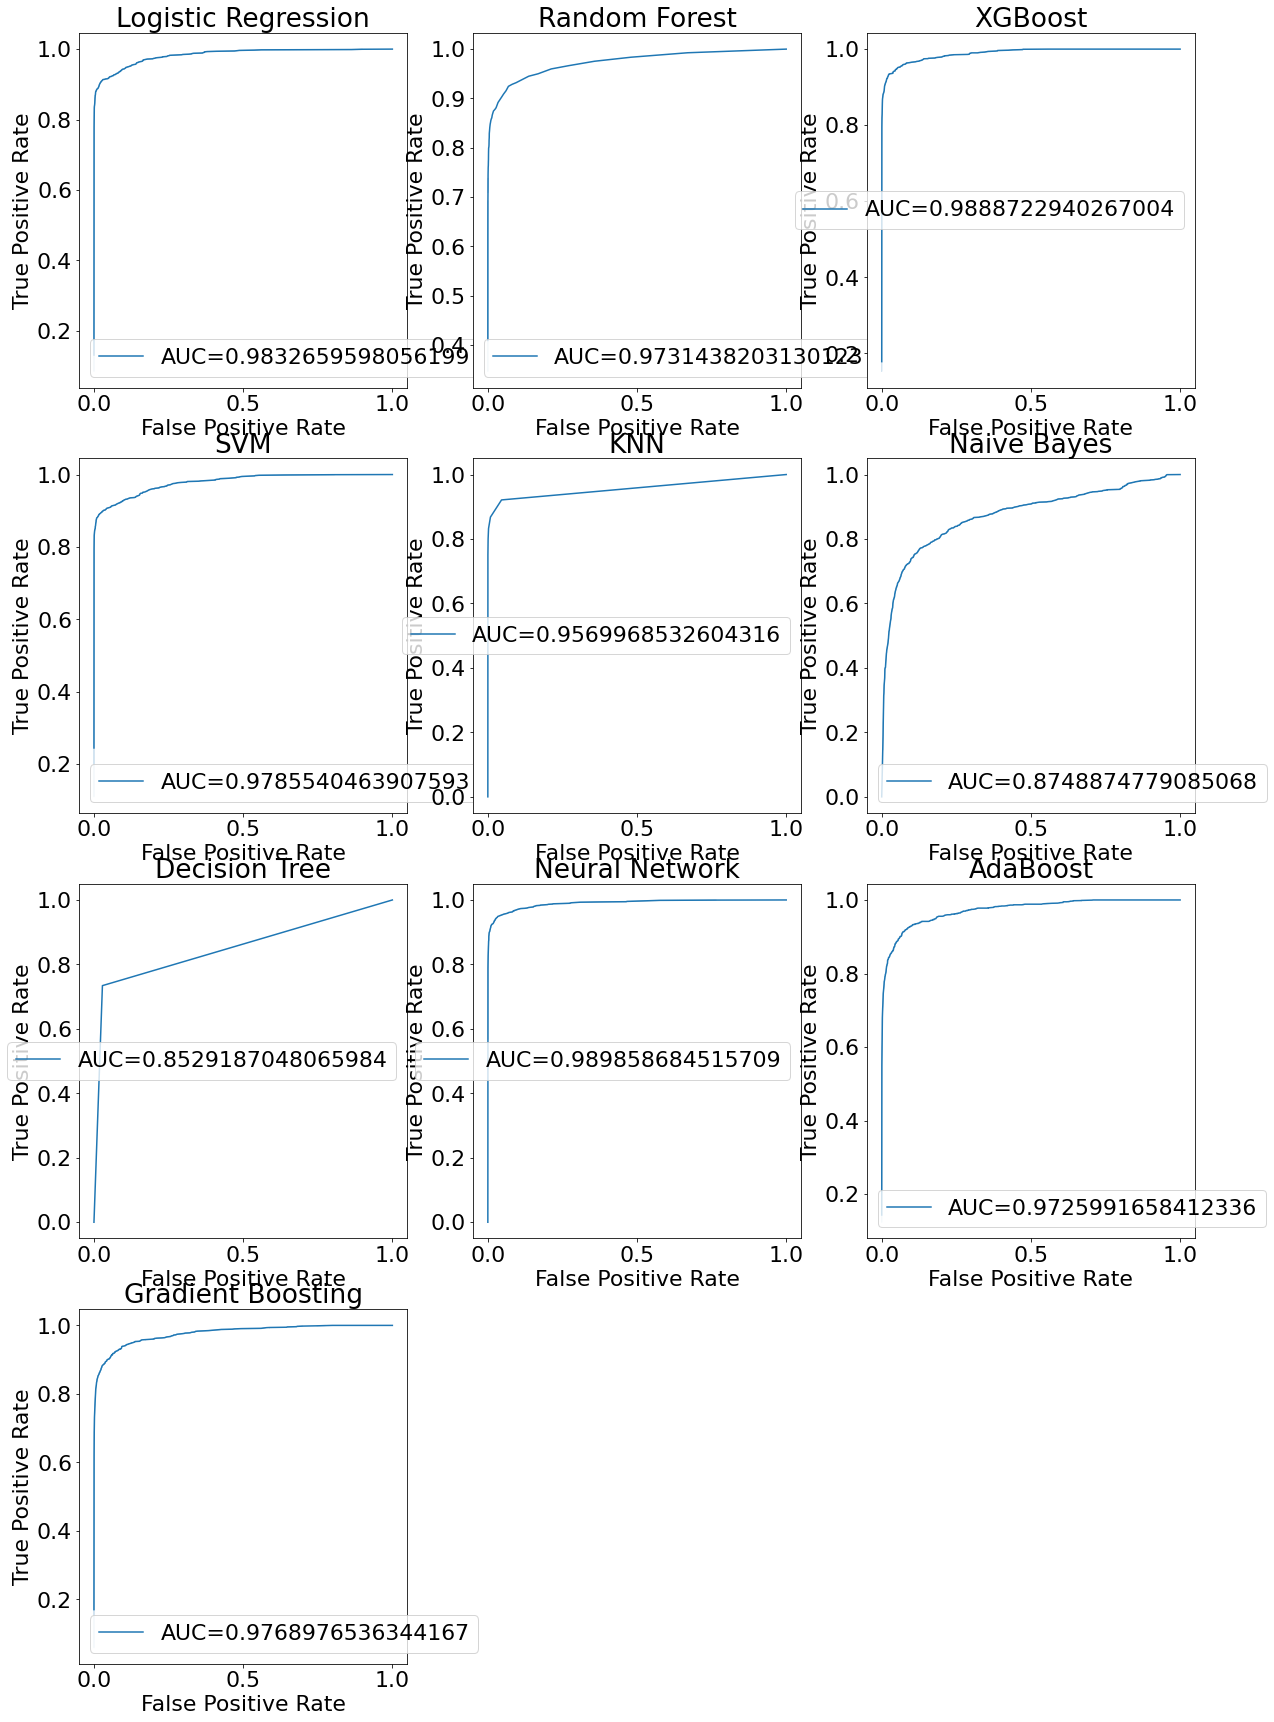

In [33]:
fig=plt.figure(figsize=(20,50))

for i in range(0,len(cl)):
    c=cl[i]
    model=model_pip[i][0]
    y_pred_proba=c.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    auc=roc_auc_score(y_test,y_pred_proba[:,1])
    sub_fig_title=fig.add_subplot(5,2,i+1).set_title(model)
    plot_map=sns.lineplot(x=fpr,y=tpr,label='AUC='+str(auc))
    plot_map.set_xlabel('False Positive Rate')
    plot_map.set_ylabel('True Positive Rate')


Text(0, 0.5, 'True Positive Rate')

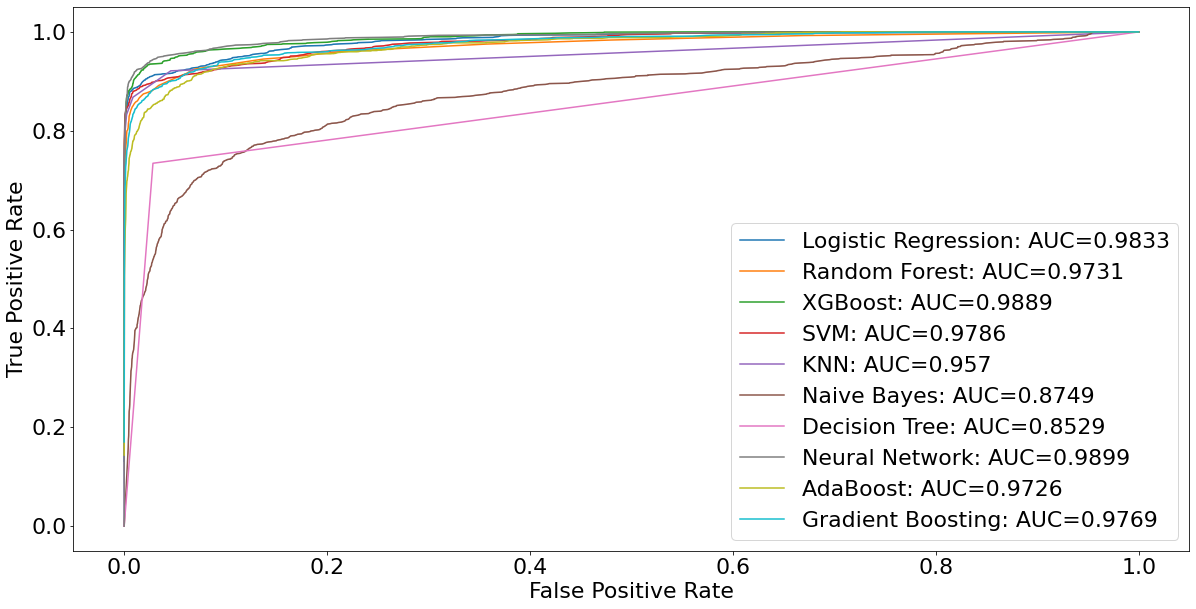

In [35]:
fig=plt.figure(figsize=(20,10))

for i in range(0,len(cl)):
    c=cl[i]
    model=model_pip[i][0]
    y_pred_proba=c.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    auc=roc_auc_score(y_test,y_pred_proba[:,1])
    #sub_fig_title=fig.add_subplot(2,5,i+1).set_title(model)
    plot_map=sns.lineplot(x=fpr,y=tpr,label=model+': AUC='+str(round(auc,4)))
plot_map.set_xlabel('False Positive Rate')
plot_map.set_ylabel('True Positive Rate')
